Dataset contains data from 2020-01-01 to 2024-08-14
Total countries/regions: 8

Latest global totals:
Total cases: 0.0
Total deaths: 0.0
Total vaccinations: 33,401,649,583.0


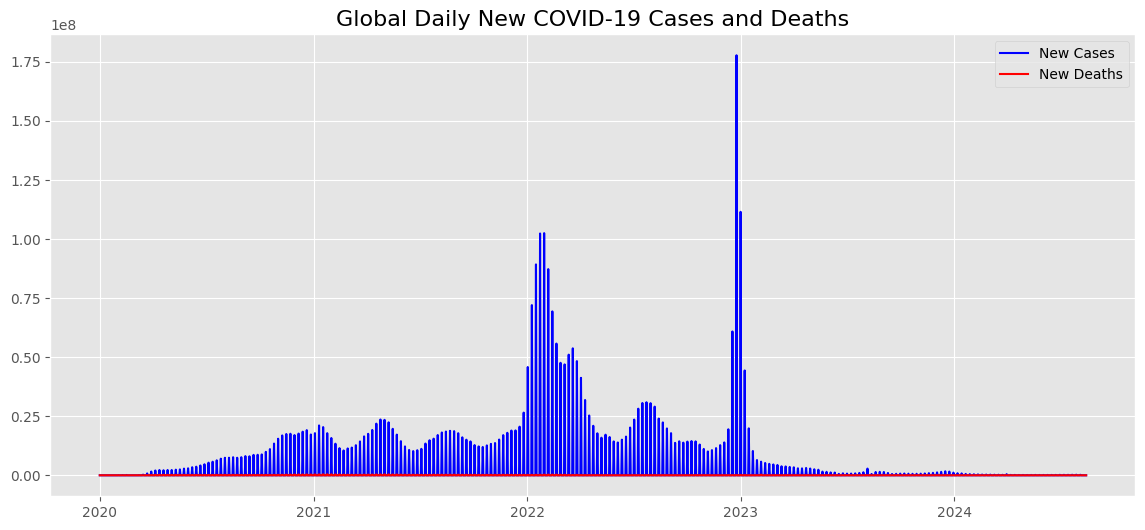

<ipython-input-1-e2c6ee8aca92>:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='total_cases', y='location', data=top_countries, palette='viridis')


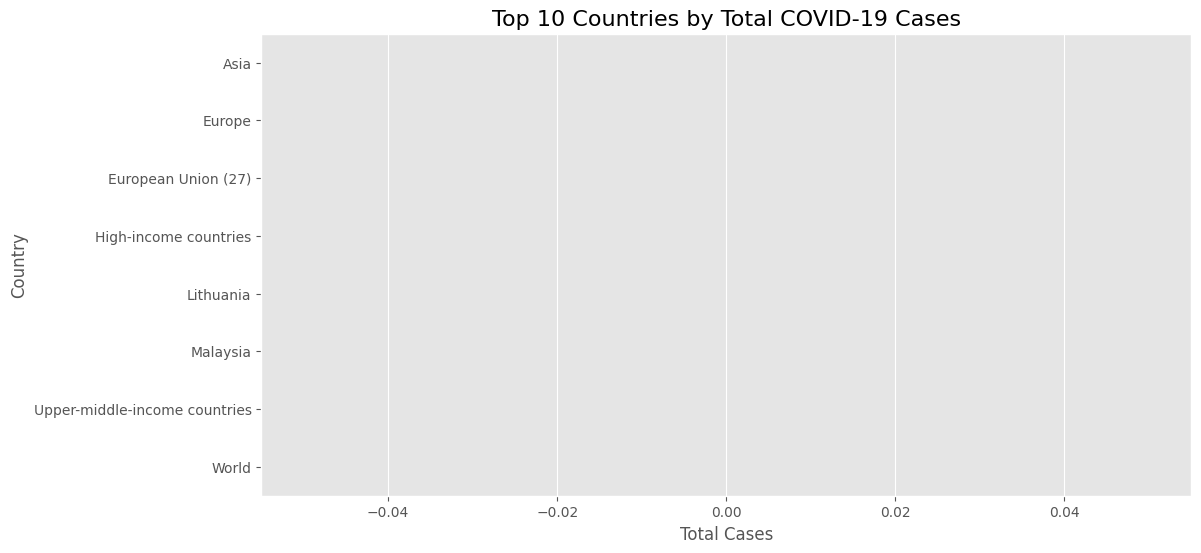

<ipython-input-1-e2c6ee8aca92>:62: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='people_fully_vaccinated_per_hundred', y='location', data=vaccination_data, palette='magma')


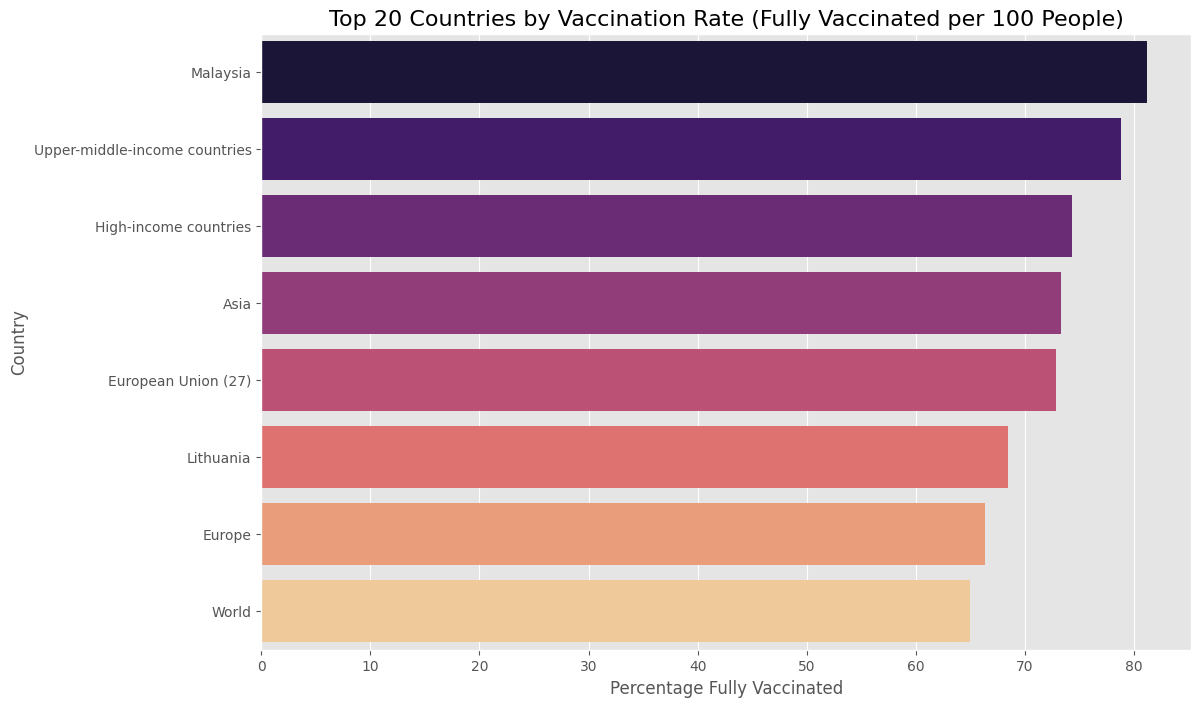

In [1]:
# COVID-19 Global Data Tracker
# Author: [Your Name]
# Date: [Today's Date]

# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from datetime import datetime

# Set up notebook
!pip install plotly --quiet
!pip install nbformat --quiet
plt.style.use('ggplot')
pd.set_option('display.max_columns', None)

# Load COVID-19 data from Our World in Data
url = "https://covid.ourworldindata.org/data/owid-covid-data.csv"
covid_data = pd.read_csv(url)

# Data cleaning and preprocessing
covid_data['date'] = pd.to_datetime(covid_data['date'])
latest_data = covid_data[covid_data['date'] == covid_data['date'].max()]

# Basic data exploration
print(f"Dataset contains data from {covid_data['date'].min().date()} to {covid_data['date'].max().date()}")
print(f"Total countries/regions: {latest_data['location'].nunique()}")
print("\nLatest global totals:")
print(f"Total cases: {latest_data['total_cases'].sum():,}")
print(f"Total deaths: {latest_data['total_deaths'].sum():,}")
print(f"Total vaccinations: {latest_data['total_vaccinations'].sum():,}")

# Visualization 1: Global Cases Over Time
global_daily = covid_data.groupby('date')[['new_cases', 'new_deaths']].sum().reset_index()

plt.figure(figsize=(14, 6))
plt.title('Global Daily New COVID-19 Cases and Deaths', fontsize=16)
plt.plot(global_daily['date'], global_daily['new_cases'], label='New Cases', color='blue')
plt.plot(global_daily['date'], global_daily['new_deaths'], label='New Deaths', color='red')
plt.fill_between(global_daily['date'], global_daily['new_cases'], color='blue', alpha=0.1)
plt.fill_between(global_daily['date'], global_daily['new_deaths'], color='red', alpha=0.1)
plt.legend()
plt.grid(True)
plt.show()

# Visualization 2: Top 10 Countries by Total Cases
top_countries = latest_data.sort_values('total_cases', ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x='total_cases', y='location', data=top_countries, palette='viridis')
plt.title('Top 10 Countries by Total COVID-19 Cases', fontsize=16)
plt.xlabel('Total Cases')
plt.ylabel('Country')
plt.show()

# Visualization 3: Vaccination Progress
vaccination_data = latest_data.dropna(subset=['people_fully_vaccinated_per_hundred'])
vaccination_data = vaccination_data.sort_values('people_fully_vaccinated_per_hundred', ascending=False).head(20)

plt.figure(figsize=(12, 8))
sns.barplot(x='people_fully_vaccinated_per_hundred', y='location', data=vaccination_data, palette='magma')
plt.title('Top 20 Countries by Vaccination Rate (Fully Vaccinated per 100 People)', fontsize=16)
plt.xlabel('Percentage Fully Vaccinated')
plt.ylabel('Country')
plt.show()

# Interactive Visualization: Global Map of Cases
fig = px.choropleth(latest_data,
                    locations="iso_code",
                    color="total_cases_per_million",
                    hover_name="location",
                    hover_data=["total_cases", "total_deaths"],
                    color_continuous_scale=px.colors.sequential.Plasma,
                    title="Total COVID-19 Cases per Million People")
fig.show()

# Save processed data
latest_data.to_csv('latest_covid_data.csv', index=False)